In [1]:
import numpy as np
from utils import toy_graph
from graphGOSPA import LP_graph_GOSPA,LP_graph_GOSPA_directed
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
#Parameters to define graphs
DelVal=0.8
delVal=1.2

In [3]:
def switch_graph(case):
    #Fig. 1 in the paper, undirected unweighted graphs 
    if case==0:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0],[10,10],[10,20]])

        adj1=np.array([[0,1,1],[1,0,1],[1,1,0]])
        adj2=np.array([[0,1,1],[1,0,1],[1,1,0]])
    elif case==1:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,20]])

        adj1=np.array([[0,1,1],[1,0,1],[1,1,0]])
        adj2=np.array([[0,1,0],[1,0,1],[0,1,0]])
    elif case==2:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal]])

        adj1=np.array([[0,1,1],[1,0,1],[1,1,0]])
        adj2=np.array([[0,1],[1,0]])
    elif case==3:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,15]])

        adj1=np.array([[0,1,1],[1,0,1],[1,1,0]])
        adj2=np.array([[0,1,0],[1,0,1],[0,1,0]])

        #Fig. 2 in the paper, undirected weighted graphs
    elif case==4:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,20]])

        adj1=np.array([[0,0.3,0.7],[0.3,0,0.5],[0.7,0.5,0]])
        adj2=np.array([[0,0.3,0.4],[0.3,0,0.5],[0.4,0.5,0]])
    elif case==5:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,20]])

        adj1=np.array([[0,0.3,0.7],[0.3,0,0.5],[0.7,0.5,0]])
        adj2=np.array([[0,0.3,0],[0.3,0,0.5],[0,0.5,0]])
    elif case==6:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal]])

        adj1=np.array([[0,0.3,0.7],[0.3,0,0.5],[0.7,0.5,0]])
        adj2=np.array([[0,0.3],[0.3,0]])

    elif case==7:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,15]])

        adj1=np.array([[0,0.3,0.7],[0.3,0,0.5],[0.7,0.5,0]])
        adj2=np.array([[0,0.3,0],[0.3,0,0.6],[0,0.6,0]])

        #Fig. 3 in the paper, directed unweighted graphs (Can be computed by LP_graph_GOSPA function ONLY)
    elif case==8:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,20]])

        adj1=np.array([[0,1,0],[0,0,1],[1,0,0]])
        adj2=np.array([[0,1,1],[0,0,1],[0,0,0]])

    elif case==9:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,20]])

        adj1=np.array([[0,1,0],[0,0,1],[1,0,0]])
        adj2=np.array([[0,1,0],[0,0,1],[0,0,0]])

    elif case==10:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal]])

        adj1=np.array([[0,1,0],[0,0,1],[1,0,0]])
        adj2=np.array([[0,1],[0,0]])

    elif case==11:
        attr1= np.array([[0,0],[10,10],[10,20]])
        attr2= np.array([[0,0-DelVal*delVal],[10,10-DelVal*delVal],[10,15]])

        adj1=np.array([[0,1,0],[0,0,1],[1,0,0]])
        adj2=np.array([[0,1,0],[0,0,1],[0,0,0]])

    graph1=toy_graph(attr=attr1,adj=adj1)
    graph2=toy_graph(attr=attr2,adj=adj2)

    return graph1,graph2


In [4]:

c=3
p=1
epsilon=1
case =8 # choose the graph. 
X,Y=switch_graph(case) #extended_LP_graph_GOSPA can be used for ALL cases, but slower than LP_graph_GOSPA in cases 0,1,2
if case <=7:
#LP_graph_GOSPA can be used for case 0,1,2,3,4,5,6,7 ONLY.
    dxy,loc_cost,false_cost,miss_cost,edge_cost=LP_graph_GOSPA(X.attr,Y.attr,X.adj,Y.adj,c,p,epsilon)
else:
#extended_LP_graph_GOSPA can be used for ALL cases, but slower than LP_graph_GOSPA in cases 0,1,2,3,4,5,6,7.
    dxy,loc_cost,false_cost,miss_cost,edge_cost=LP_graph_GOSPA_directed(X.attr,Y.attr,X.adj,Y.adj,c,p,epsilon)


print(f'graphGOSPA metric for case {case} is : {dxy}')
print(f'Node attribute cost for case {case} is : {loc_cost}')
print(f'False node cost for case {case} is : {false_cost}')
print(f'Missed node cost for case {case} is : {miss_cost}')
print(f'Edge mismatch cost for case {case} is : {edge_cost}')


graphGOSPA distance for case 8 is : 2.920000000000001
location cost for case 8 is : 1.9200000000000008
false cost for case 8 is : 0.0
miss cost for case 8 is : 0.0
edge cost for case 8 is : 1.0


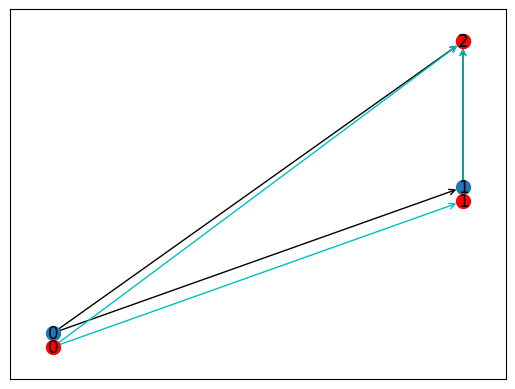

In [14]:
G1=nx.from_numpy_array(X.adj)
G2=nx.from_numpy_array(Y.adj)
plt.figure()
if case<=7:
    nx.draw_networkx(G1,pos=X.attr,with_labels=True,node_size=100)
    nx.draw_networkx(G2,pos=Y.attr,with_labels=True,node_color='r',node_size=100,edge_color='c')
else:
    nx.draw_networkx(G1,pos=X.attr,arrows=True,with_labels=True,node_size=100,arrowstyle='->')
    nx.draw_networkx(G2,pos=Y.attr,arrows=True,with_labels=True,node_color='r',node_size=100,arrowstyle='->',edge_color='c')